In [1]:
import numpy as np
import matplotlib.pyplot as plt

# One-Step Methods for ODEs

For a numerical approximation of the Initial Value Problem (IV) 

$$y' = f(x,y), \quad y(x_0) = y_0$$

on interval $[x_0, \bar{x}]$ we first discretise the interval into $N$ subintervals with $h_n = x_{n+1} -x_n$ and get the one-step rule:

$$y_{n+1} = y_n + h_n \Phi(h_n,x_n,y_n)$$

where $\Phi$ is the increment function. In order to derive the Runge-Kutta Methods we consider the Volterra Integral equation:

$$y(x_0 + h ) = y_0 + \int_{x_0}^{x_0+h} f(t,y(t)) dt$$

and approximate the integral by a quadrature formula with.

## Explicit Runge-Kutta Methods

The family of explicit Runge-Kutta methods is given by

$$y_(n+1) = y_n + h_n \sum_{i=1}^s b_i k_i$$

where

+ $k_1 = f(x_n, y_n)$
+ $k_2 = f(x_n + c_2 h_n, y_n + h_n a_{21} k_1)$
+ $k_3 = f(x_n + c_3 h_n, y_n + h_n (a_{31} k_1 + a_{32} k_2))$
+ $\vdots$
+ $k_s = f(x_n + c_s h_n, y_n + h_n (a_{s1} k_1 + a_{s2} k_2 + \ldots + a_{s,s-1} k_{s-1}))$

these coefficients are usually given in a Butcher tableau:

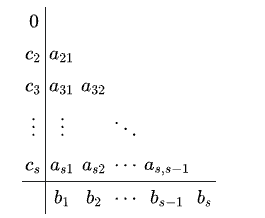


### List of Important Explicit Methods

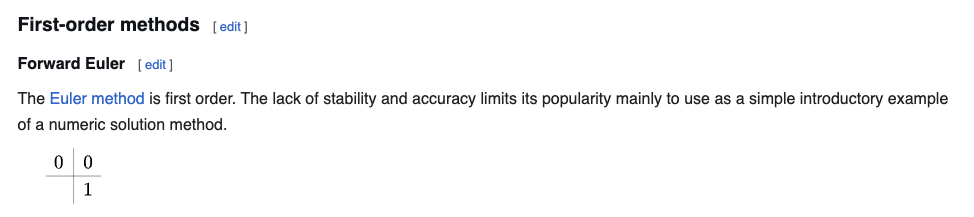

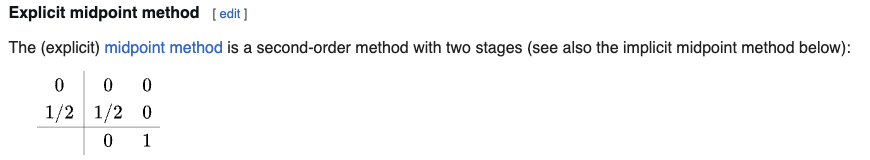

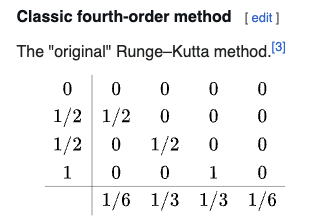

**Exercise:** Modelling of the Lorenz Attractor

This is a coupled systems of ordinary, first-order differential equations with have parameters $\sigma, \rho, \beta$ and initial conditions $x(0), y(0), z(0)$.

+ $\dot{u} = \sigma (v-u)$
+ $\dot{v} = \rho u - v - uv$
+ $\dot{w} = uv - \beta w$


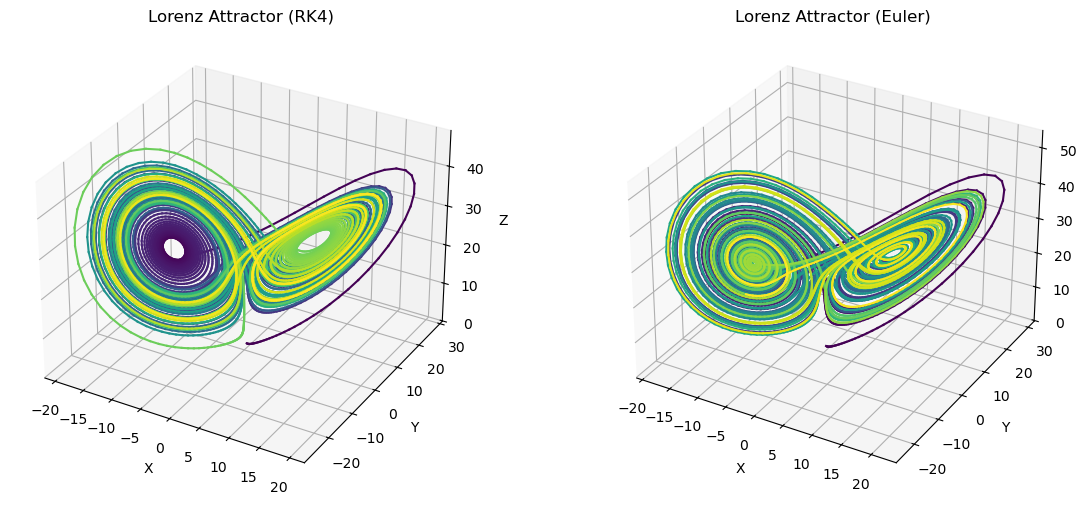

In [2]:
# Initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# maximum time point and number of time steps
tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    u,v,w = X
    u_dot = sigma * (v - u)
    v_dot = rho * u - v - u * w
    w_dot = u * v - beta * w
    return np.array([u_dot, v_dot, w_dot])

def rk4_step(f, t, X, h, *args):
    """ 
    Performs a single step of the classical Runge-Kutta method (RK4)

    Arguments:
    f -- function that returns the derivative of X at time t
    t -- current time
    X -- current value of the state vector
    h -- step size
    *args -- additional arguments to pass to f
    """
    k1 = f(t, X, *args)
    k2 = f(t + h/2, X + h/2 * k1, *args)
    k3 = f(t + h/2, X + h/2 * k2, *args)
    k4 = f(t + h, X + h * k3, *args)
    return X + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

def euler_step(f, t, X, h, *args):
    """ 
    Performs a single step of the explicit Euler method

    Arguments:
    f -- function that returns the derivative of X at time t
    t -- current time
    X -- current value of the state vector
    h -- step size
    *args -- additional arguments to pass to f
    """
    return X + h * f(t, X, *args)

# Time discretization
t_values = np.linspace(0, tmax, n)
h = t_values[1] - t_values[0]
# Initialize arrays to store the results
X_rk4 = np.zeros((n, 3))
X_euler = np.zeros((n, 3))
X_rk4[0] = np.array([u0, v0, w0])
X_euler[0] = np.array([u0, v0, w0])

# Time integration using RK4 and Euler methods and plotting
for i in range(1, n):
    X_rk4[i] = rk4_step(lorenz, t_values[i-1], X_rk4[i-1], h, sigma, beta, rho)
    X_euler[i] = euler_step(lorenz, t_values[i-1], X_euler[i-1], h, sigma, beta, rho)

# Plotting the results
fig = plt.figure(figsize=(14, 6))
# Color map accordint to time
colors = plt.cm.viridis(np.linspace(0, 1, n))
# RK4 plot
ax1 = fig.add_subplot(121, projection='3d')
for i in range(n-1):
    ax1.plot(X_rk4[i:i+2, 0], X_rk4[i:i+2, 1], X_rk4[i:i+2, 2], color=colors[i])
ax1.set_title('Lorenz Attractor (RK4)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
# Euler plot
ax2 = fig.add_subplot(122, projection='3d')
for i in range(n-1):
    ax2.plot(X_euler[i:i+2, 0], X_euler[i:i+2, 1], X_euler[i:i+2, 2], color=colors[i])
ax2.set_title('Lorenz Attractor (Euler)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
plt.show()

    

## Convergenz of One-Step Methods


**Theorem**

Let $y(x)$ be the solution to the IVP $y' = f(x,y), y(x_0) = y_0$ on $[x_0, \bar{x}]$. If now:

1. the local error fullfills $||y(x + h) - y(x) - h \Phi(h,x,y(x))|| \leq C h^{p+1}$ for all $x \in [x_0, \bar{x}]$ and $h$ sufficiently small
2. $\Phi$ is lipschitz continious with respect to the second argument $||\phi(h,x,y) - \phi(h,x,z)|| \leq \Lambda ||y-z||$

Then the global error fullfills:

$$||y_n - y(x_n) || \leq \frac{C}{\Lambda} (e^{\Lambda (x_n - x_0)} - 1) h^p$$


**Lemma**

If the function $f$ is lipschitz continious with respect to the second argument, $||f(x,y) - f(x,z)||\leq L||y-z||$ then $\Phi$ has the properties needed for the theorem above.

**Theorem (Convergenz of Runge_Kutta Methods)**

Let $U \subset \R \times \R^m$ be open and $f: U \to \R^m$ $p$-times continiously differentialbe and $y:[x_0, \bar{x}] \to \R^m$ be the solution of the IVP $y' = f(x,y), y(x_0) = y_0$. Then the explicit Runge-Kutta method with $s$ stages and coefficients $a_{ij}, b_i, c_i$ is convergent of order $p$. This means $\exists M > 0, \exists \bar{h} > 0$ such that for all discretizations and small step size 

$$||y_n - y(x_n)|| \leq M h^p$$

## Embedded Runge-Kutta Methods

Goal of this method is to make an automatic step size control. This is done by using two methods of different order $p$ and $p-1$ with the same stages but different weights

+ $y_1 = y_0 + h \sum_{i=1}^s b_i k_i$ (order $p$)
+ $y_2 = y_0 + h \sum_{i=1}^s \hat{b}_i k_i$ (order $p-1$)

For the error we calculate $E = y_1 - y_2 = Ch^p + O(h^{p+1})$ which is asymptotically correct. In the following we implement the Bogacki-Shampine method which has three stages.

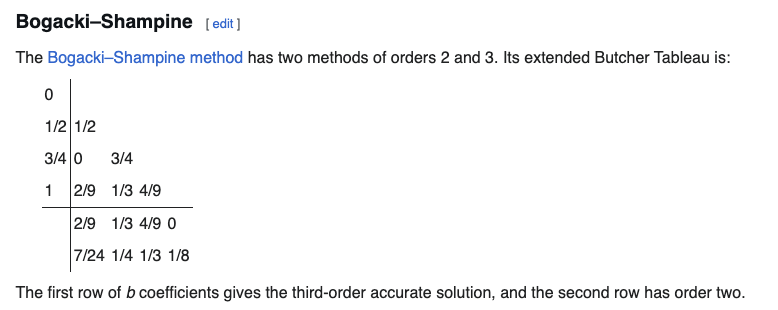



In order to calculate the new step size we set a tolerance $tol$ and $||y_1 - y(x_0 + h)|| = tol$. We now that $tol \approx Ch^p_{opt}$ and $est = ||y_1-y_2|| \approx Ch^p$. From this we get the new step size:

$$h_{opt} = h \left(\frac{tol}{est}\right)^{\frac{1}{p}}$$

**Algorithm**

Calculate with step size $h$ the approximations $y_1,y_2$ and the error estimate

$$est = ||h \sum_{i=1}^s (b_i - \hat{b}_i) k_i|| = ||y_1 - y_2||$$

and by using this $h_{opt}$ if now $est \leq tol$ we accept the step and set:

+ $x_0 = x_0 + h$
+ $y_0 = y_1$
+ $h = min(h_{opt}, 2h)$

else we reject the step and set:

$h = h_{opt}$


**Better Formula for h_opt**

In practical setting for finding h_opt we use the following formula:

$$h_{opt} = h min(a, max(b, (tol/est)^{1/p}))$$

with $a = 6, b = 0.2$

For the implementation we consider as an application the three body problem:

+ $y_1'' = y_1 + 2y_2' - (1- \mu) \frac{y_1 + \mu}{D_1} - \mu \frac{y_1 - 1 + \mu}{D_2}$
+ $y_2'' = y_2 - 2y_1' - (1- \mu) \frac{y_2}{D_1} - \mu \frac{y_2}{D_2}$

with $D_1 = ((y_1 + \mu)^2 + y_2^2)^{3/2}$ and $D_2 = ((y_1 - 1 + \mu)^2 + y_2^2)^{3/2}$ and $\mu = 0.012277471$

Starting values are:

+ $y_1(0) = 0.994$
+ $y_2(0) = 0$
+ $y_1'(0) = 0$
+ $y_2'(0) = -2.0015851063790825224$

First we transform into a first order system by setting $u_1 = y_1, u_2 = y_2, u_3 = y_1', u_4 = y_2'$:

+ $u_1' = u_3$
+ $u_2' = u_4$
+ $u_3' = u_1 + 2u_4 - (1- \mu) \frac{u_1 + \mu}{D_1} - \mu \frac{u_1 - 1 + \mu}{D_2}$
+ $u_4' = u_2 - 2u_3 - (1- \mu) \frac{u_2}{D_1} - \mu \frac{u_2}{D_2}$  
+ $D_1 = ((u_1 + \mu)^2 + u_2^2)^{3/2}$
+ $D_2 = ((u_1 - 1 + \mu)^2 + u_2^2)^{3/2}$



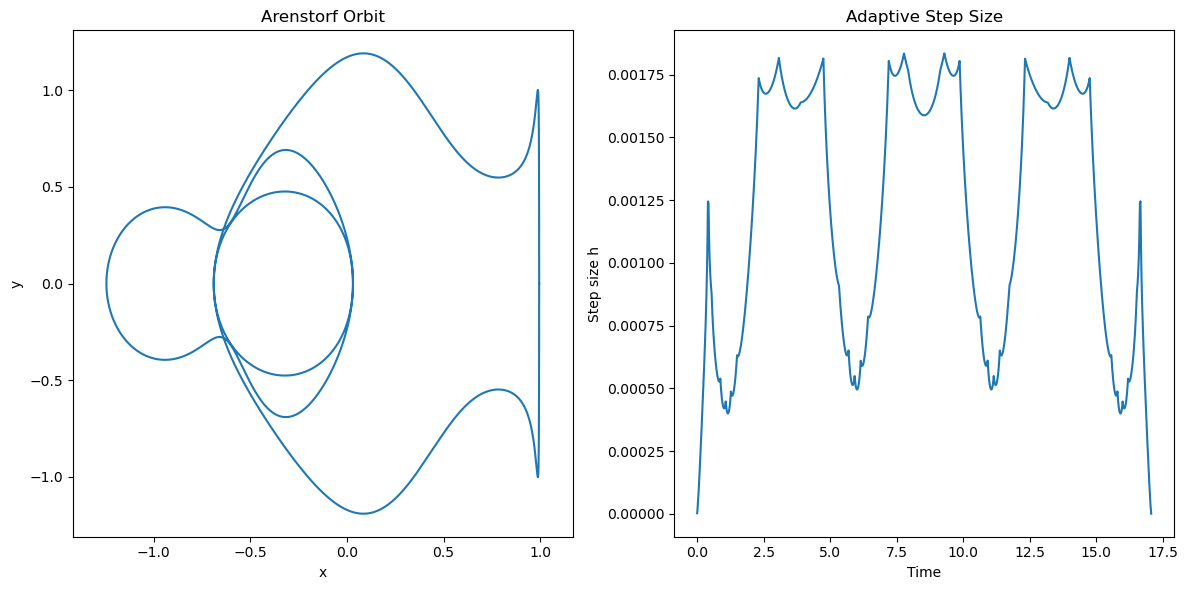

In [3]:
def arenstorf_system(t, y):
    """
    Convert the second-order system to first-order:
    Let u = [y1, y2, y1', y2']
    """
    y1, y2, y1_dot, y2_dot = y
    mu = 0.012277471
    
    # Calculate D1 and D2
    D1 = ((y1 + mu)**2 + y2**2)**1.5
    D2 = ((y1 - 1 + mu)**2 + y2**2)**1.5
    
    # Equations for second derivatives
    y1_ddot = y1 + 2*y2_dot - (1-mu)*(y1 + mu)/D1 - mu*(y1 - 1 + mu)/D2
    y2_ddot = y2 - 2*y1_dot - (1-mu)*y2/D1 - mu*y2/D2
    
    return np.array([y1_dot, y2_dot, y1_ddot, y2_ddot])

def bogacki_shampine(f,t_span, y0, n_steps,h_min = 1e-6, h_max=0.5, tol=1e-10):
    """ 
    Implementation of the Bogacki-Shampine embedded Runge-Kutta method for solving ODEs with adaptive step size control.
    Arguments:
    f -- function that returns the derivative of y at time t
    t_span -- tuple (t0, tf) specifying the time interval
    y0 -- initial value of the state vector
    n_steps -- number of steps to take
    h_min -- minimum step size
    h_max -- maximum step size
    tol -- tolerance for error control
    """
    t0,tf = t_span
    t_values = [t0]
    y_values = [y0]
    h_list = []
    h = (tf - t0) / n_steps
    t = t0
    y = y0

    while t < tf:
        if t + h > tf:
            h = tf - t
        # Compute the stages
        k1 = f(t,y)
        k2 = f(t+ h/2, y + h/2 * k1)
        k3 = f(t + 3*h/4, y + 3*h/4 * k2)
        k4 = f(t + h, y + h* (2/9 * k1 + 1/3 * k2 + 4/9 * k3))

        # Compute the 3rd and 2nd order estimates
        y3 = y + h * (2/9 * k1 + 1/3*k2 + 4/9 * k3)
        y2 = y + h * (7/24 * k1 + 1/4*k2 + 1/3 * k3 + 1/8 * k4)

        # Estimate the error
        error = np.linalg.norm(y3 - y2, ord=np.inf)

        if error < tol:
            t += h
            y = y3
            t_values.append(t)
            y_values.append(y)
            h_list.append(h)
            
            # Adjust step size
            h_opt = h *min(6, max(0.1, 0.9 * (tol / error)**(1/3)))
            h = min(h_opt, h_max)
        else:
            h = max(h / 2, h_min)
    return np.array(t_values), np.array(y_values), np.array(h_list)

# Initial conditions
y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
t_span = (0, 17.0652165601579625588917206249)
n_steps = 48000
t_values, y_values, h_values = bogacki_shampine(arenstorf_system, t_span, y0, n_steps)
# Plotting the results
fig = plt.figure(figsize=(12, 6))
# Orbit plot
ax1 = fig.add_subplot(121)
ax1.plot(y_values[:,0], y_values[:,2])
ax1.set_title('Arenstorf Orbit')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.axis('equal')
# Step size plot
ax2 = fig.add_subplot(122)
ax2.plot(t_values[:-1], h_values)
ax2.set_title('Adaptive Step Size')
ax2.set_xlabel('Time')
ax2.set_ylabel('Step size h')
plt.tight_layout()
plt.show()

Solving with N = 6000 steps...
Solving with N = 12000 steps...
Solving with N = 24000 steps...
Solving with N = 48000 steps...


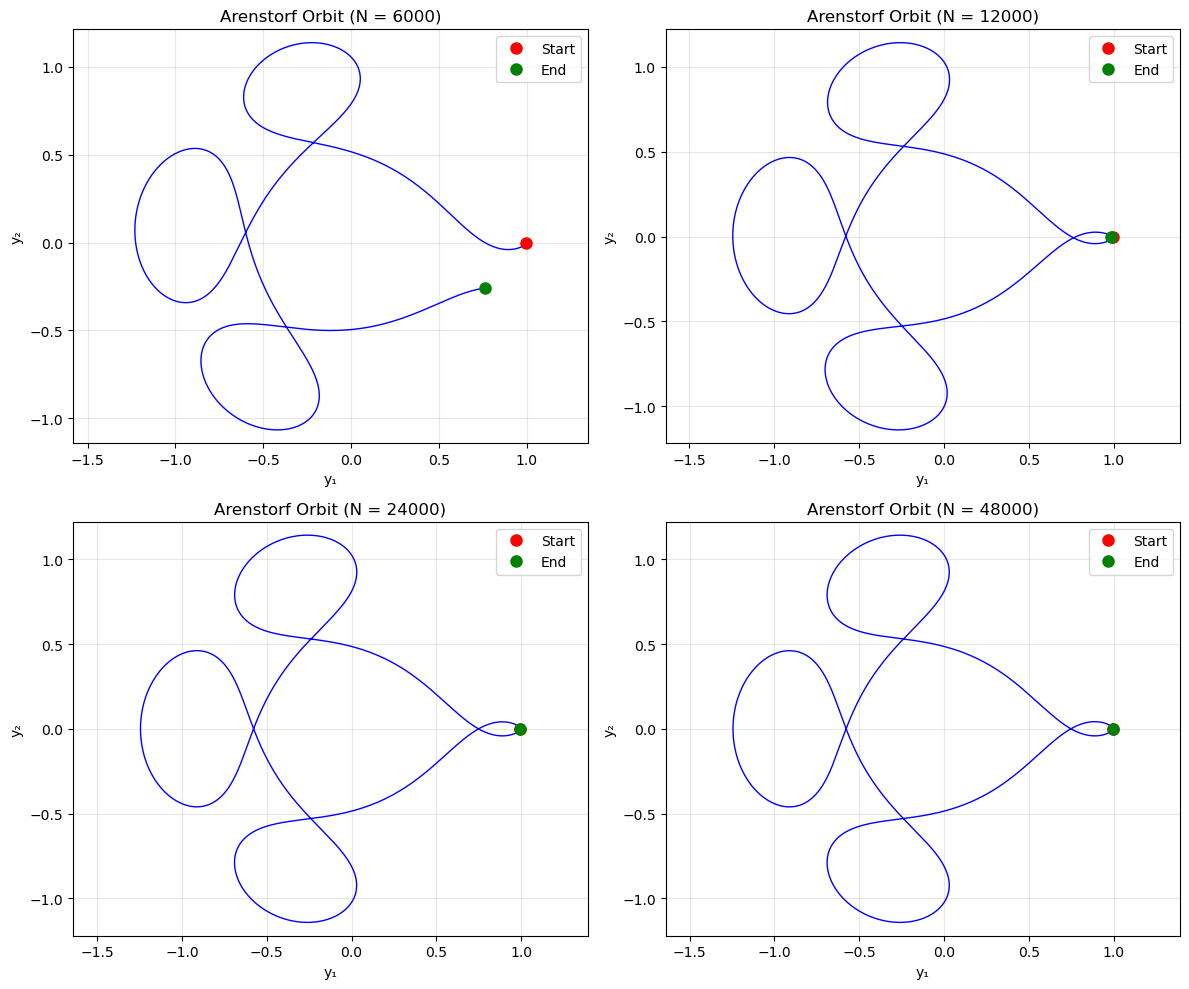

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def arenstorf_system(t, y, mu):
    """
    Convert the second-order system to first-order:
    Let u = [y1, y2, y1', y2']
    """
    y1, y2, y1_dot, y2_dot = y
    
    # Calculate D1 and D2
    D1 = ((y1 + mu)**2 + y2**2)**1.5
    D2 = ((y1 - 1 + mu)**2 + y2**2)**1.5
    
    # Equations for second derivatives
    y1_ddot = y1 + 2*y2_dot - (1-mu)*(y1 + mu)/D1 - mu*(y1 - 1 + mu)/D2
    y2_ddot = y2 - 2*y1_dot - (1-mu)*y2/D1 - mu*y2/D2
    
    return np.array([y1_dot, y2_dot, y1_ddot, y2_ddot])

def runge_kutta_4(f, t_span, y0, n_steps, mu):
    """
    4th-order Runge-Kutta method
    """
    t0, tf = t_span
    h = (tf - t0) / n_steps
    
    t = np.linspace(t0, tf, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0
    
    for i in range(n_steps):
        k1 = h * f(t[i], y[i], mu)
        k2 = h * f(t[i] + h/2, y[i] + k1/2, mu)
        k3 = h * f(t[i] + h/2, y[i] + k2/2, mu)
        k4 = h * f(t[i] + h, y[i] + k3, mu)
        
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, y

# Parameters
mu = 0.012277471
t_span = (0, 17.06521656015796255889)
y0 = np.array([0.994, 0, 0, -2.0015851063790855224])

# Different step sizes to test
N_values = [6000, 12000, 24000, 48000]

# Solve for each N and plot
plt.figure(figsize=(12, 10))

for j, N in enumerate(N_values):
    print(f"Solving with N = {N} steps...")
    
    t, y = runge_kutta_4(arenstorf_system, t_span, y0, N, mu)
    
    # Extract positions
    y1 = y[:, 0]
    y2 = y[:, 1]
    
    # Create phase plot
    plt.subplot(2, 2, j+1)
    plt.plot(y1, y2, 'b-', linewidth=1)
    plt.plot(y1[0], y2[0], 'ro', markersize=8, label='Start')
    plt.plot(y1[-1], y2[-1], 'go', markersize=8, label='End')
    plt.xlabel('y₁')
    plt.ylabel('y₂')
    plt.title(f'Arenstorf Orbit (N = {N})')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.legend()

plt.tight_layout()
plt.show()

## Stiff-Differential Equations

> Stiff differential euqations are problems where explicit methods perform pooly, i.e. they require very small step sizes to achieve a certain accuracy.

Via linearization of the autonomous IVP $y' = f(y), y(x_0) = y_0$ around a point $y^*$ with $f(y^*) = 0$ we get the Dahlquist test equation:

$$ y' = \lambda y, y(0) = y_0, \lambda \in \mathbb{C}, Re(\lambda) < 0$$

The solution to this equation is given by $y(x) = e^{\lambda (x-x_0)}y_0$ and has the properties:

+ The solution is bounded by the initial value: $|y(x)| \leq |y_0|$ for all $x \geq x_0$
+ The solution converges to zero for $x \to \infty$: $\lim_{x \to \infty} y(x) = 0$


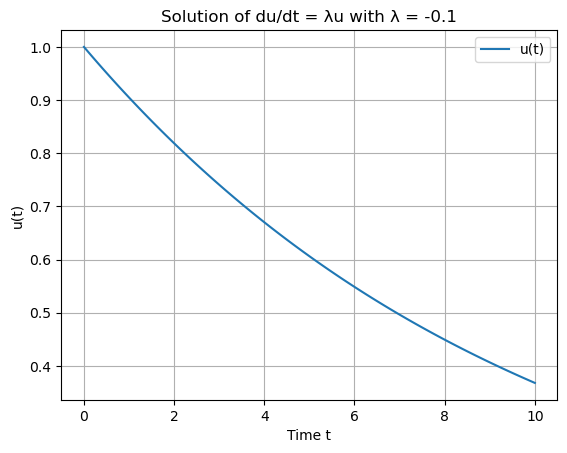

In [5]:
from scipy.integrate import solve_ivp
mlambda = -1e-1
A = np.matrix([mlambda])
F = lambda t,u: A.dot(u.flatten())

# Initial condition
u0 = np.ones(A.shape[0])

# Time points
t = [0,10]
sol = solve_ivp(F, t, u0, method='RK45', t_eval=np.linspace(t[0], t[1], 100))
plt.plot(sol.t, sol.y[0], label='u(t)')
plt.xlabel('Time t')
plt.ylabel('u(t)')
plt.title('Solution of du/dt = λu with λ = -0.1')
plt.legend()
plt.grid()
plt.show()


The following code shows of the solution to a non-stiff ODE with $y' = Ay$ and $A = \lambda, \lambda = -0.1$. We can see that RK4 works fine with the given step size. If we consider now the same equation with with $\lambda_1 = -0.1$ and $\lambda_2= 100 \lambda_1$ we get a stiff equation

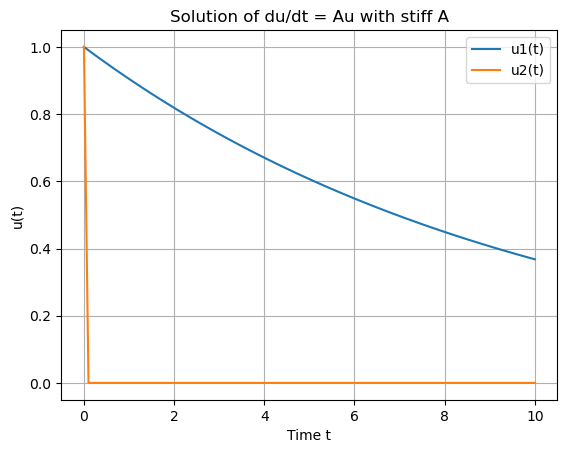

In [6]:
mlambda1 = -1e-1
mlambda2 = 1e3 * mlambda1
A = np.matrix([[mlambda1, 0], [0, mlambda2]])
F = lambda t,u: A.dot(u.flatten())

# Initial condition
u0 = np.ones(A.shape[0])
# Time points
t = [0,10]
sol = solve_ivp(F, t, u0, method='RK45', t_eval=np.linspace(t[0], t[1], 100))
plt.plot(sol.t, sol.y[0], label='u1(t)')
plt.plot(sol.t, sol.y[1], label='u2(t)')
plt.xlabel('Time t')
plt.ylabel('u(t)')
plt.title('Solution of du/dt = Au with stiff A')
plt.legend()
plt.grid()
plt.show()

The given second part of this solution is very stiff and shows a sharp decay and bad performance of explicit Runge-Kutta Method

### Stability of Explizit Methods

After applying the Dahlquist test equation to an explizit Runge-Kutta Method we get the following stepping rule:

$$y_1 = (1 + zb^T(I - zA)^{-1} e) y_0$$

where $z = \lambda h$. The stability function is now given by:

$$R(Z) = 1+ zb^T(I - zA)^{-1} e$$

**Theorem:** For a $s$-stage explicit Runge-Kutta Method the Stability function is a polynomial of degree less or equal to $s$

If one has a method with order $p=s$ then the stability function is equal to the Taylor polynomial:

$$R(z) = 1 + z + \frac{z^2}{2!} + \ldots + \frac{z^p}{p!}$$

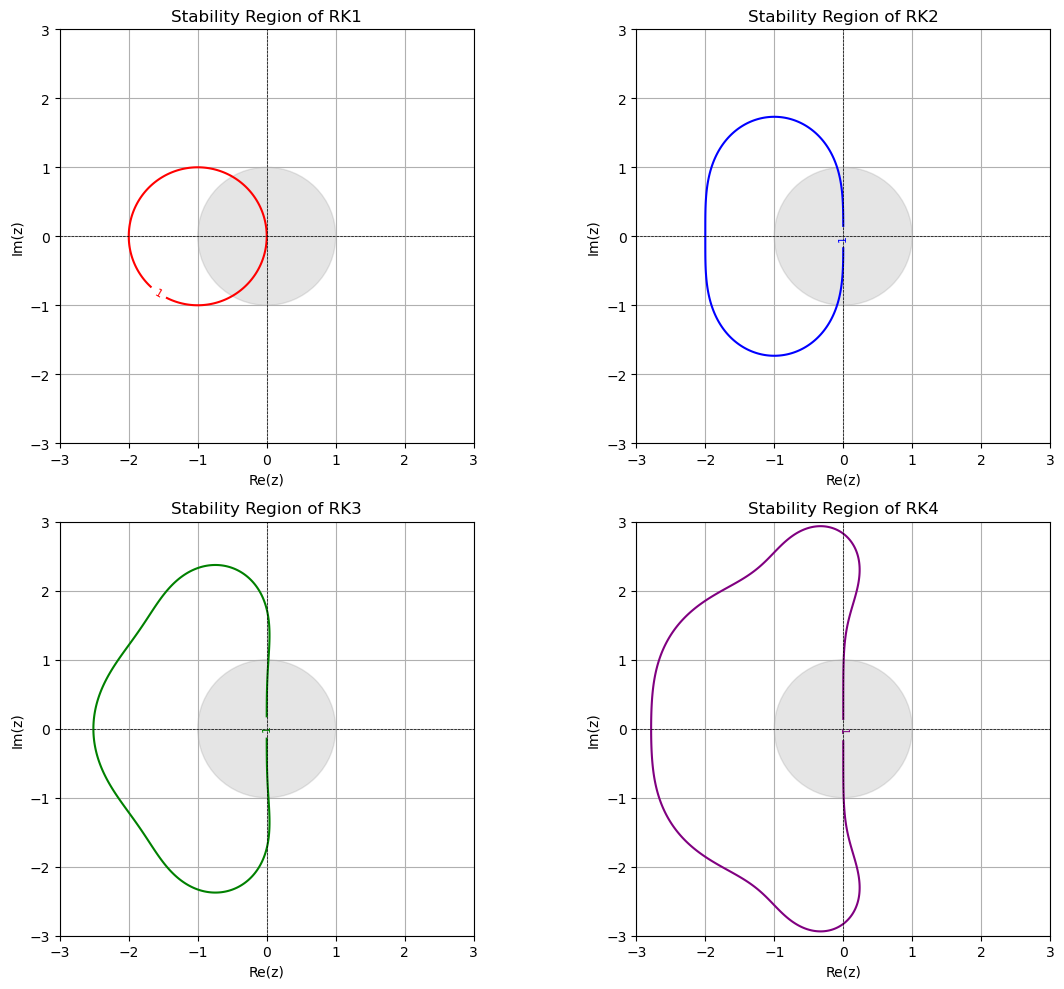

In [7]:
from matplotlib.patches import Circle

def R_RK1(z):
    return 1 + z

def R_RK2(z):
    return 1 + z + z**2 / 2

def R_RK3(z):
    return 1 + z + z**2 / 2 + z**3 / 6

def R_RK4(z):
    return 1 + z + z**2 / 2 + z**3 / 6 + z**4 / 24

x = np.linspace(-3,3,800)
y = np.linspace(-3,3,800)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Compute |R(z)|
R1 = np.abs(R_RK1(Z))
R2 = np.abs(R_RK2(Z))
R3 = np.abs(R_RK3(Z))
R4 = np.abs(R_RK4(Z))

fig,axes = plt.subplots(2,2, figsize=(12,10))
axes = axes.flatten()

methods = [
    (R1, 'RK1', 'red'),
    (R2, 'RK2', 'blue'),
    (R3, 'RK3', 'green'),
    (R4, 'RK4', 'purple')
]
for ax, (R, label, color) in zip(axes, methods):
    contour = ax.contour(X, Y, R, levels=[1], colors=color)
    ax.clabel(contour, inline=True, fontsize=8)
    ax.add_patch(Circle((0,0), 1, color='gray', alpha=0.2))
    ax.set_title(f'Stability Region of {label}')
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.axhline(0, color='black',linewidth=0.5, ls='--')
    ax.axvline(0, color='black',linewidth=0.5, ls='--')
    ax.set_aspect('equal')
    ax.grid(True)
plt.tight_layout()
plt.show()

This plot shows of the stability region $S \{ z \in \mathbb{C}: |R(z)| < 1 \}$ for different RK methods. Now $z = h \lambda$ if we want stability we need $|R(z)| < 1$ so that the solution is bounded. 

**Theorem:** For an explicit Runge-Kutta method the stability region is a bounded region of $\mathbb{C}$

## Implicit Runge-Kutta Methods

As mentioned explicit Runge-Kutta methods are generally unsuitable for the solution of stiff ODEs because their stability regions are bounded. An implicit Runge-Kutta method is of the form:

$$y_{n+1} = y_n + h_n \sum_{i=1}^s b_i k_i$$

where $k_1 = f(x_n + c_i h, y_n + h_n \sum_{j=1}^s a_{ij} k_j)$ for $i = 1, \ldots, s$.

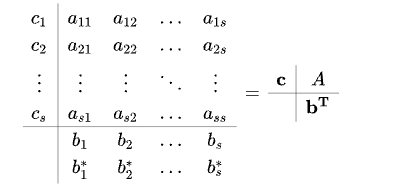


Examples of the most important implicit Runge Kutta methods are the backward Euler method and the trapezoidal rule:

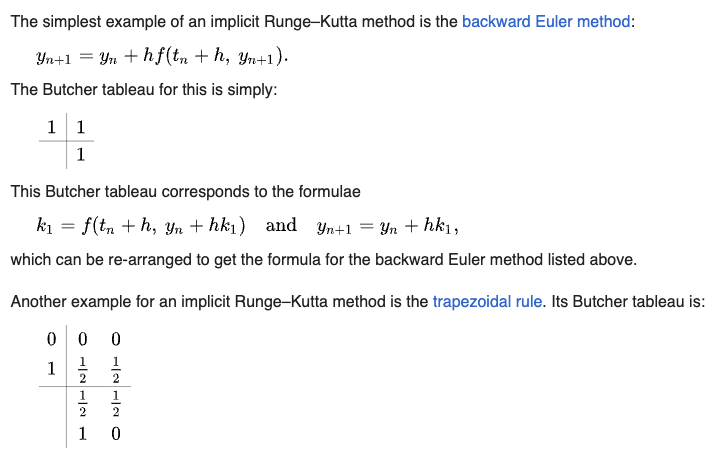


**Order-Conditions for Implicit Runge-Kutta Methods** Similar to explicit Runge-Kutta methods we can derive order conditions for implicit Runge-Kutta methods:

+ Order 1: $\sum_{i=1}^s b_i = 1$
+ Order 2: $\sum_{i=1}^s b_i c_i = \frac{1}{2}$
+ Order 3: $\sum_{i=1}^s b_i c_i^2 = \frac{1}{3}, \sum_{i=1}^s \sum_{j=1}^s b_i a_{ij} c_j = \frac{1}{6}$




### Exercise Räuber-Beute Model**

We now want to solve the following system of equation which models the interaction of predators and prey:

+ $u' = -c_3 u^2 + c_4 u v$
+ $v' = c_1v - c_2 v^2 - c_4 uv$ 

We should use $c_1 = 4, c_2 = 0.002, c_3 = 0.3, c_4 = 0.05$ and the initial values $u(0) = 100, v(0) = 2000$, and use implicit Euler and trapezoidal rule 

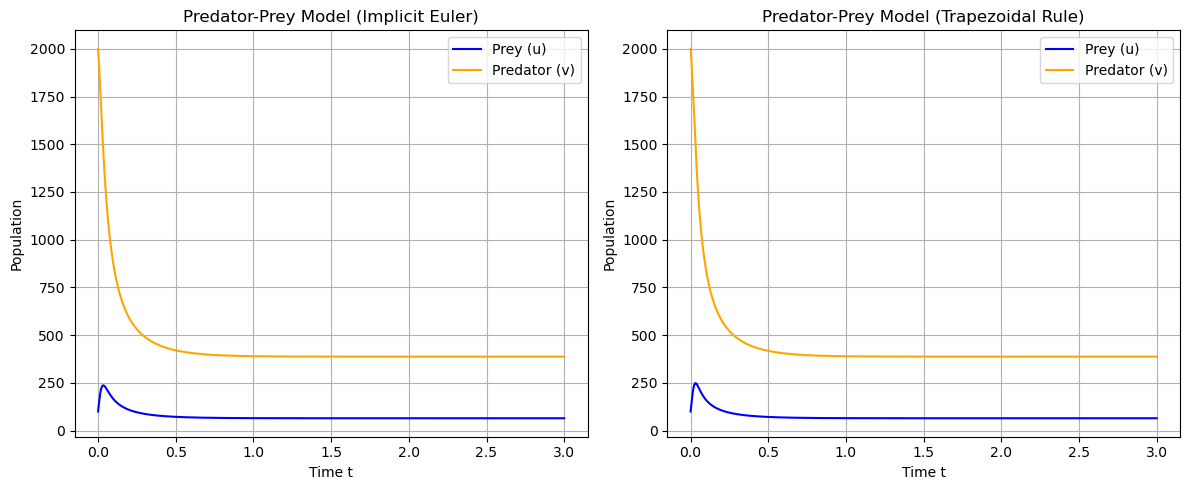

In [8]:
from scipy.optimize import root

def predator_prey(t,z):
    c_1,c_2,c_3,c_4 = 4,0.002,0.3,0.05
    u,v = z 
    u_dot = -c_3 * u**2 + c_4 * u * v
    v_dot = c_1 * v - c_2 * v**2 - c_4 * u * v
    return np.array([u_dot, v_dot])

def implicit_euler(f,t_span, y0, n_steps, h):
    t0,tf = t_span
    t_values = np.linspace(t0, tf, n_steps + 1)
    y_values = np.zeros((n_steps + 1, len(y0)))
    y_values[0] = y0

    for i in range(n_steps):
        def F(y_next):
            return y_next - y_values[i] - h * f(t_values[i+1], y_next) # Implicit equation u
        y_values[i+1] = root(F, y_values[i]).x
    return t_values, y_values

def trapezoidal_rule(f,t_span, y0, n_steps, h):
    t0,tf = t_span
    t_values = np.linspace(t0, tf, n_steps + 1)
    y_values = np.zeros((n_steps + 1, len(y0)))
    y_values[0] = y0

    for i in range(n_steps):
        def F(y_next):
            k1 = f(t_values[i], y_values[i])
            k2 = f(t_values[i+1], y_next)
            return y_next - y_values[i] - (h/2) * (k1 + k2) # Implicit equation u
        y_values[i+1] = root(F, y_values[i]).x
    return t_values, y_values

# Initial conditions
u0, v0 = 100, 2000
y0 = np.array([u0, v0])
t_span = (0, 3)
n_steps = 500
h = (t_span[1] - t_span[0]) / n_steps
# Solve using Implicit Euler
t_ie, y_ie = implicit_euler(predator_prey, t_span, y0, n_steps, h)
# Solve using Trapezoidal Rule
t_tr, y_tr = trapezoidal_rule(predator_prey, t_span, y0, n_steps, h)
# Plotting the results
plt.figure(figsize=(12, 5))
# Implicit Euler plot
plt.subplot(1, 2, 1)
plt.plot(t_ie, y_ie[:,0], label='Prey (u)', color='blue')
plt.plot(t_ie, y_ie[:,1], label='Predator (v)', color='orange')
plt.title('Predator-Prey Model (Implicit Euler)')
plt.xlabel('Time t')
plt.ylabel('Population')
plt.legend()
plt.grid()
# Trapezoidal Rule plot
plt.subplot(1, 2, 2)
plt.plot(t_tr, y_tr[:,0], label='Prey (u)', color='blue')
plt.plot(t_tr, y_tr[:,1], label='Predator (v)', color='orange')
plt.title('Predator-Prey Model (Trapezoidal Rule)')
plt.xlabel('Time t')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Stability Functions of Implicit Runge-Kutta Methods

The stability function of an implicit Runge-Kutta method is given by:

$$R(z) = 1+ zb^T(I-zA)^{-1} 1$$

the stability region then is

$$S = \{ z \in \mathbb{C}: |R(z)| < 1 \}$$

we say that the method is A-stable if the left half plane is contained in the stability region, i.e. $\{ z \in \mathbb{C}: Re(z) < 0 \} \subset S$

**Stability Region of Implicit Euler**

The stability region of the implicit Euler method is given by $R(z) = \frac{1}{1-z}$

**Stability Region of Trapezoidal Rule**

The stability region of the trapezoidal rule is given by $R(z) = \frac{1 + \frac{z}{2}}{1 - \frac{z}{2}}$



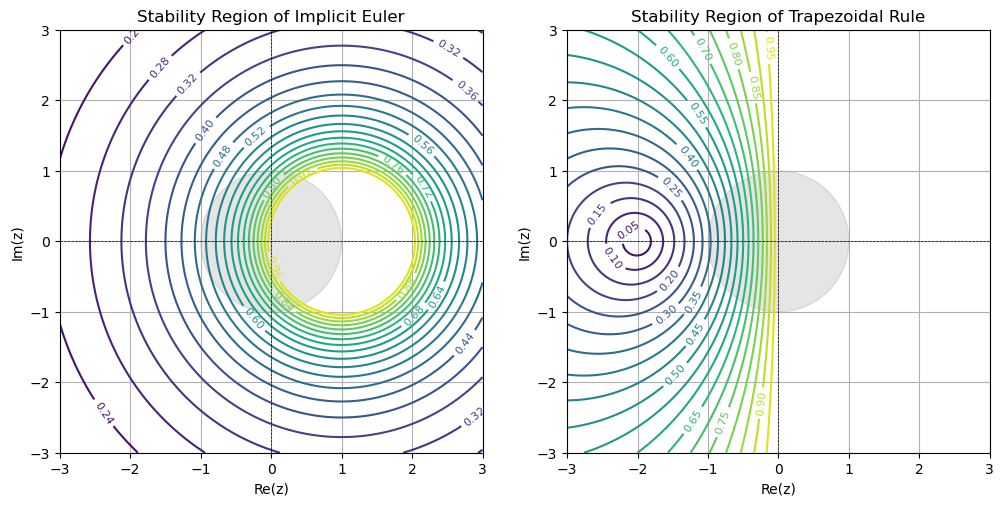

In [9]:
# Plotting the stability regions of implict euler and trapezoidal rule

x = np.linspace(-3,3,800)
y = np.linspace(-3,3,800)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

def R_IE(z):
    return 1 / (1 - z)

def R_TR(z):
    return (1 + z/2) / (1 - z/2)
R_ie = np.abs(R_IE(Z))
R_tr = np.abs(R_TR(Z))

# Loop over all points and set values outside the stability region to NaN
R_ie[R_ie > 1] = np.nan
R_tr[R_tr > 1] = np.nan

# Color the map according to the value of |R(z)|
fig,axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()  
methods = [
    (R_ie, 'Implicit Euler', 'red'),
    (R_tr, 'Trapezoidal Rule', 'blue')
]
for ax, (R, label, color) in zip(axes, methods):   
    contour = ax.contour(X, Y, R, levels=20, cmap='viridis')
    ax.clabel(contour, inline=True, fontsize=8)
    ax.add_patch(Circle((0,0), 1, color='gray', alpha=0.2))
    ax.set_title(f'Stability Region of {label}')
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.axhline(0, color='black',linewidth=0.5, ls='--')
    ax.axvline(0, color='black',linewidth=0.5, ls='--')
    ax.set_aspect('equal')
    ax.grid(True)


This plot basically shows that both methods are A stable as the left half plane is contained in the stability region, different to the explicit methods where the stability region is bounded.

### Radau IIA Methods and Gauß Methods

We can define two order rules for implicit Runge-Kutta methods:

+ $B(p) = \sum_{i=1}^s b_i c_i^{k-1} = \frac{1}{k}$ for $k = 1, \ldots, p$
+ $C(q) = \sum_{j=1}^s a_{ij} c_j^{k-1} = \frac{c_i^k}{k}$ for $i = 1, \ldots, s, k = 1, \ldots, q$

$B(p)$ is the condition that the quadrature formula has order $p$ then $C(q)$ is the condition that the internal stages have order $q$.

**Theorem:** If $c_1,...,c_s$ are pairwise distinct then the $s \times s$ matrix $A is given by $C(s)$

We can now remember some basic facts about quadrature formulas:

+ The quadratur formula has order $p$ if the weights and nodes fullfill $B(p)$
+ The Gaussian-quadrature formula has $s$ nodes and order $2s$
+ The Radau-Quadrature formula has $s$ nodes, one of them is $1$ and order $2s-1$

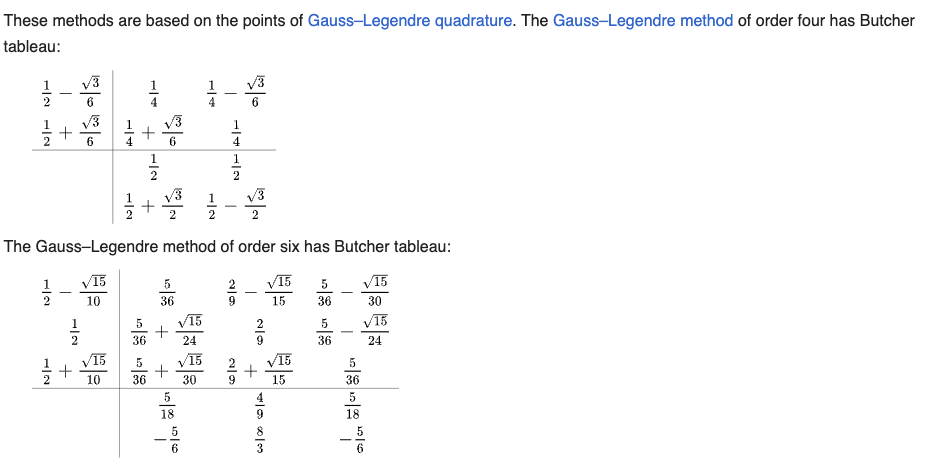

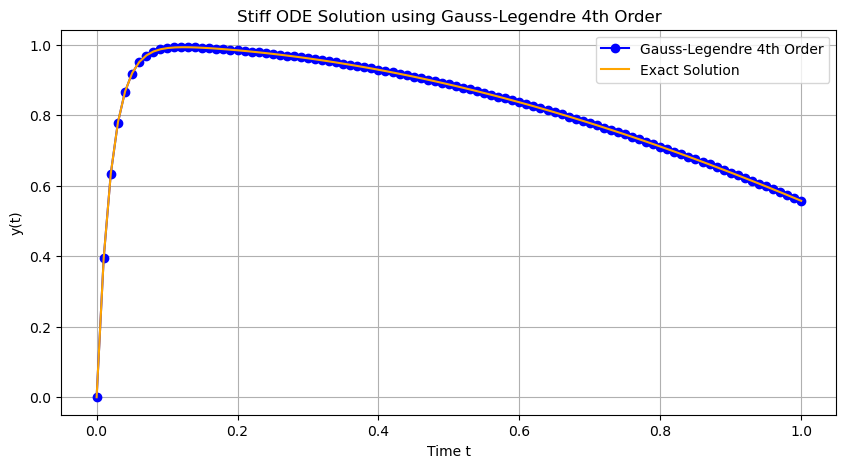

In [10]:
from scipy.optimize import fsolve

def ode(t,y):
    """ 
    Example of a stiff ODE
    """
    return -50 * (y - np.cos(t))

def soln(t):
    return (50/2501)*(np.sin(t) + 50*np.cos(t)) - (2500/2501)*np.exp(-50*t)

def gauss_legendre_4(f,t_span, y0, n_steps):
    """ 
    Implementation of the 4th order Gauss-Legendre implicit Runge-Kutta method for solving ODEs.
    Arguments:
    f -- function that returns the derivative of y at time t
    t_span -- tuple (t0, tf) specifying the time interval
    y0 -- initial value of the state vector
    n_steps -- number of steps to take
    """
    t0,tf = t_span
    t_values = np.linspace(t0, tf, n_steps + 1)
    h = t_values[1] - t_values[0]
    y_values = np.zeros((n_steps + 1, len(y0)))
    y_values[0] = y0

    # Coefficients
    c1,c2 = 0.5 - np.sqrt(3)/6, 0.5 + np.sqrt(3)/6
    a11, a12 = 0.25, 0.25 - np.sqrt(3)/6
    a21, a22 = 0.25 + np.sqrt(3)/6, 0.25
    b1, b2 = 0.5, 0.5

    for i in range(n_steps):
        def F(K):
            K1, K2 = K[:len(y0)], K[len(y0):]
            F1 = K1 - f(t_values[i] + c1*h, y_values[i] + h*(a11*K1 + a12*K2))
            F2 = K2 - f(t_values[i] + c2*h, y_values[i] + h*(a21*K1 + a22*K2))
            return np.concatenate([F1, F2])
        
        K_initial = np.zeros(2 * len(y0))
        K_solution = fsolve(F, K_initial)
        K1, K2 = K_solution[:len(y0)], K_solution[len(y0):]
        
        y_values[i+1] = y_values[i] + h * (b1*K1 + b2*K2)
    return t_values, y_values

# Initial conditions
t = (0, 1)
y0 = np.array([0])
n_steps = 100
# Solve using Gauss-Legendre 4th order
t_gl, y_gl = gauss_legendre_4(ode, t, y0, n_steps)
# Exact solution
t_exact = np.linspace(t[0], t[1], 100)
y_exact = soln(t_exact)
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(t_gl, y_gl[:,0], 'o-', label='Gauss-Legendre 4th Order', color='blue')
plt.plot(t_exact, y_exact, '-', label='Exact Solution', color='orange')
plt.title('Stiff ODE Solution using Gauss-Legendre 4th Order')
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()


This already shows that the Gauß-method can pretty accurately approximate the solution of this stiff problem.

## Collocation Methods

For this we again consider the IVP $y'= f(x,y), y(x_0) = y_0$. For numerical approximation we choose a step size $h$ and collocation points $c_1, \ldots, c_s \in [0,1]$. We now want to find a polynomial $p$ with degree $s$ with the following conditions:

+ $p(x_0) = y_0$
+ $p'(x_0 + c_ih) = f(x_0 + c_ih, p(x_0 + c_ih))$ for $i = 1, \ldots, s$

for a numerical approximation we set $y_1 = p(x_0 + h)$.

**Theorem:** THe Colloation method with the nodes $c_1,...,c_s$ is equivalent to the implicit Runge-Kutta method with the coefficients:

+ $a_{ij} = \int_0^{c_i} l_j(t) dt$ where $l_j$ are the Lagrange polynomials to the nodes $c_1,...,c_s$
+ $b_j = \int_0^1 l_j(t) dt$

with

$$l_j(t) = \prod_{\substack{i=1 \\ i \neq j}}^s \frac{t - c_i}{c_j - c_i}$$

is the Lagrange polynomial to the node $c_j$.


**Theorem:** Given a collocation method with nodes $c_1,...c_s$ then the coefficients calculated above fullfill $B(p)$ and $C(q)$


### Lagrange Polynomials

The Lagrange Interpolating Polynomial is the unique polynomial of lowest degree that interpolates a given set of data.

**Definition:** Given $k+1$ nodes $\{x_0 ,... x_k \}$ which are all distinct $x_j \neq x_m$ the Lagrange basis for polynomials is a set of polynomials $\{l_0(x), ..., l_k(x) \}$ which hase the properties:

+ $l_j(x_m ) = 0$ if $j \neq m$
+ $l_j(x_m ) = 1$ if $j = m$

Formally this is described by the product:

$$l_j(x) = \prod_{\substack{m=0 \\ m \neq j}}^k \frac{x - x_m}{x_j - x_m}$$

**Example** Fint the Lagrange Basis polynomials for the data set $x = [0,1,2]$ and $y = [1,3,2]$. Plot each polynomial

+ $P_1(x) = \frac{(x-1)(x-2)}{(0-1)(0-2)} = \frac{1}{2}(x^2 - 3x + 2)$
+ $P_2(x) = \frac{(x-0)(x-2)}{(1-0)(1-2)} = -x^2 + 2x$
+ $P_3(x) = \frac{(x-0)(x-1)}{(2-0)(2-1)} = \frac{1}{2}(x^2 - x)$

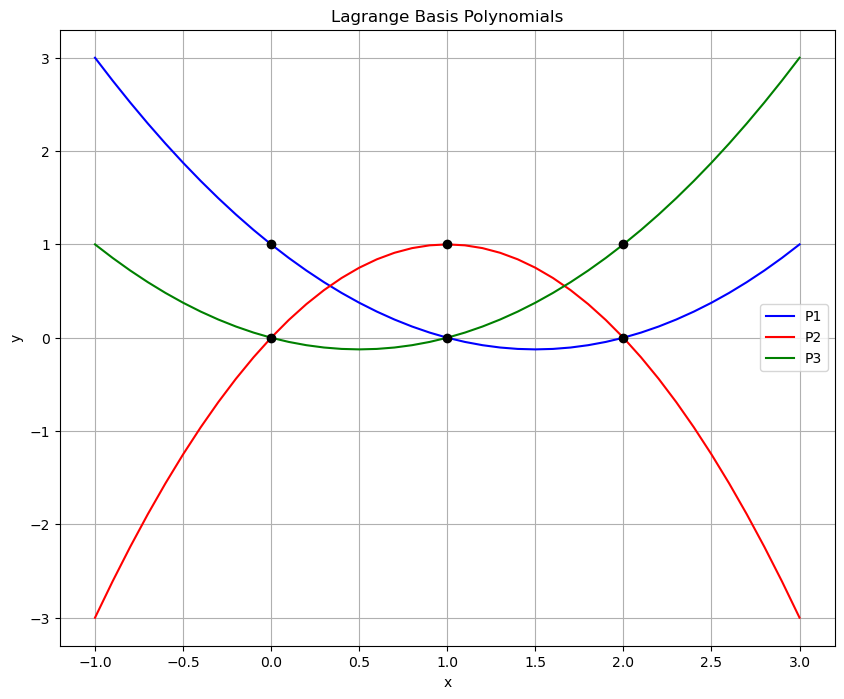

In [11]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt


x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()